### TYK2 Structural Integration

Human and clinical genetics provides one way of interpreting functional genetic variation. However, biophysics and structural biology also provide a necessary view that considers the physical impact of amino acid substitutions on protein structure instead of evaluating mutation-phenotype links across existing populations. While there will be more, the most fundamental biophysical label to assign each residue is its' secondary structure: either `HELIX`, `STRAND` or `TURN`.

This currently shows IFN-alpha 100 U/mL normalized to Untreated from Assay 7:

In [3]:
library(patchwork)
library(ggbeeswarm)
library(ggpubr)
library(scales)
library(cowplot)
library(ggnewscale)
library(scico)
library(tidyverse)

scale_fill_scico_mid <- function(..., mid = 0, alpha = NULL, begin = 0, end = 1, direction = 1, reverse = TRUE ,palette = "broc") {
  if (!requireNamespace("ggplot2", quietly = TRUE)) {
        stop("ggplot2 is required for this functionality", call. = FALSE)
  }
  force(mid)
  ggplot2::continuous_scale(
    aesthetics = "fill", 
    scale_name = "gradient2",
    palette = scales::gradient_n_pal(
      colours = scico(256, alpha, begin, end, direction, palette), 
      values = NULL, space = "Lab"),
    guide="colourbar",
    rescaler = function(x, to = c(0, 1), from = range(x, na.rm = TRUE)) {
      scales::rescale_mid(x, to, from, mid)
    },
    ...
  )
}

In [6]:
sec_struct <- read_tsv("../data/annotations/tyk2-secondary-structure.tsv",
                       col_names = c("type", "start", "stop"))

domains <- read_tsv("../data/annotations/tyk2-domains.tsv",
                       col_names = c("domain", "start", "stop")) %>%
    filter(domain != "DISORDERED")

disordered <- read_tsv("../data/annotations/tyk2-domains.tsv",
                       col_names = c("domain", "start", "stop")) %>%
    filter(domain == "DISORDERED")

sumstats <- read_tsv("../sumstats/TYK2/run7/tyk2-assay7.tsv")

Rows: 98 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): type
dbl (2): start, stop

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): domain
dbl (2): start, stop

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 6 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): domain
dbl (2): start, stop

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 94876 Columns: 14
── Column specification ─────────────────────────────

In [25]:
disord_plot <- ggplot(disordered) +
    geom_rect(aes(ymin = 0, ymax = 1, xmin = start, xmax = stop), fill = "purple", color = "purple") +
    theme_void() +
    theme(legend.pos = "right",
          legend.title = element_blank()) +
    scale_fill_manual(values = c("HELIX" = "red", "STRAND" = "lightblue4", "TURN" = "goldenrod3")) +
    coord_cartesian(xlim = c(0,1188))

domain_plot <- ggplot(domains) +
    geom_rect(aes(ymin = 0, ymax = 1, xmin = start, xmax = stop), color = "black", alpha = 0) +
    geom_text(aes(x = (start + stop)/2, y = 0.5, label = domain), color = "black", size = 7) +
    theme_void() +
    theme(legend.pos = "right",
          legend.title = element_blank()) +
    scale_fill_manual(values = c("HELIX" = "red", "STRAND" = "lightblue4", "TURN" = "goldenrod3")) +
    coord_cartesian(xlim = c(0,1188))

sec_plot <- ggplot(sec_struct %>% filter(type != "TURN")) +
    geom_rect(aes(ymin = 0, ymax = 1, xmin = start, xmax = stop, fill = type)) +
    theme_void() +
    theme(legend.pos = "right",
          legend.title = element_blank()) +
    scale_fill_manual(values = c("HELIX" = "red", "STRAND" = "lightblue4", "TURN" = "goldenrod3")) +
    coord_cartesian(xlim = c(0,1188))

heatmap <- sumstats %>%
    mutate(aa = if_else(aa %in% c("*", "X"), "Stop", aa),
           aa = factor(aa, levels = c("G", "A", "P", "K", "H",
                                      "R", "T", "S", "C", "E",
                                      "D", "M", "V", "I", "L",
                                      "Y", "W", "F", "Q", "N",
                                      "Stop"))) %>%
    filter(condition == "IFNalpha100_0 - None_0") %>%
    rename("Log2\nFold Change" = "estimate") %>%
    ggplot() +
            geom_tile(aes(x = pos, y = fct_rev(aa), fill = `Log2\nFold Change`)) +
            scale_fill_scico_mid(limits = c(-3, 3), palette = "vik", mid = 0, oob = squish) +
            theme_pubr(base_size = 20) +
            theme(legend.text=element_text(size=14),
                  legend.key.size = unit(1,"cm"),
                  axis.text.y = element_text(size = 14),
                  legend.pos = "right") +
            ylab("") + xlab("TYK2 Amino Acid Position") +
    coord_cartesian(xlim = c(0,1188))

combined_plot <- plot_grid(disord_plot + theme(legend.pos = "none"),
          domain_plot + theme(legend.pos = "none"),
          sec_plot + theme(legend.pos = "none"),
          heatmap + theme(legend.pos = "none"),
          rel_heights = c(0.05, 0.1, 0.05, 1),
          ncol = 1, align='v')

ggsave("../dataviz/TYK2/ifna/TYK2-IFNaDMS-Assay7-Structure-2.pdf",
        combined_plot,
        height = 6, width = 18)

ggsave("../dataviz/TYK2/ifna/TYK2-IFNaDMS-Assay7-Structure-3.pdf",
        heatmap,
        height = 6, width = 18)

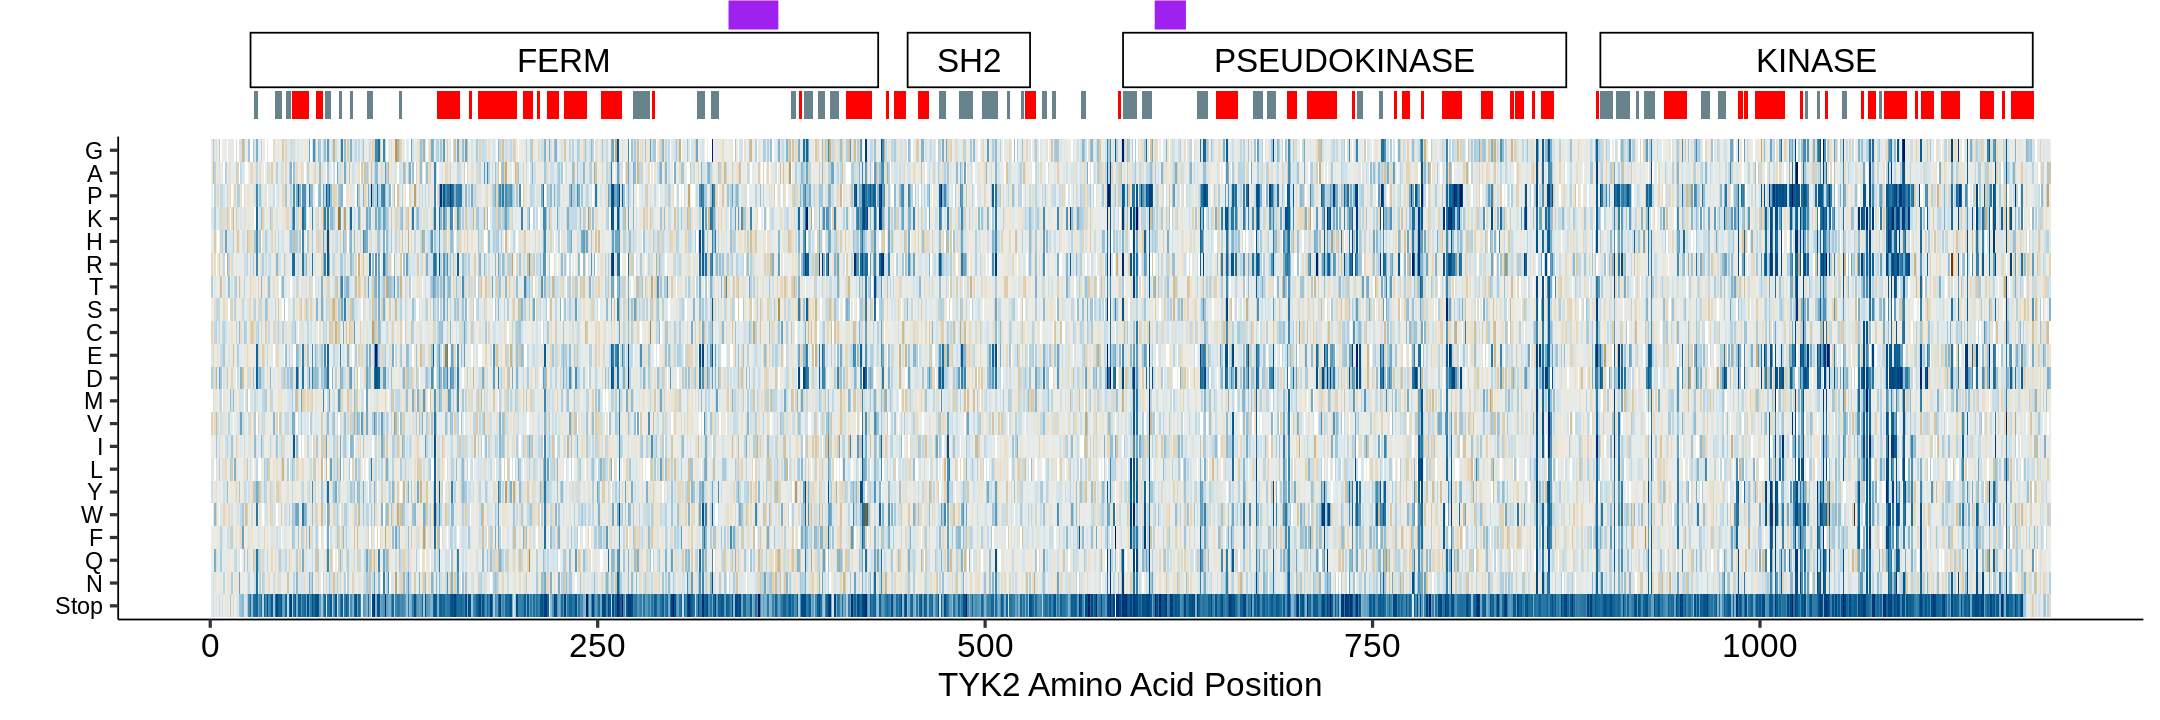

In [26]:
options(repr.plot.width = 18, repr.plot.height = 6)
combined_plot

For a more systematic comparison, we can compare the Z-statistic distributions among each group:

In [99]:
sec_struct_expanded <- sec_struct %>%
    rowwise() %>%
    mutate(pos = paste0(seq(start, stop), collapse = ",")) %>%
    separate_rows(pos, sep = ",") %>%
    select(-start, -stop) %>%
    mutate(pos = as.numeric(pos))

sumstats_struct <- sumstats %>%
    mutate(aa = if_else(aa %in% c("*", "X"), "Stop", aa)) %>%
    filter(condition == "IFNalpha100 - IFNbeta100") %>% 
    left_join(sec_struct_expanded, by = "pos") %>%
    mutate(type = if_else(is.na(type), "NONE", type))

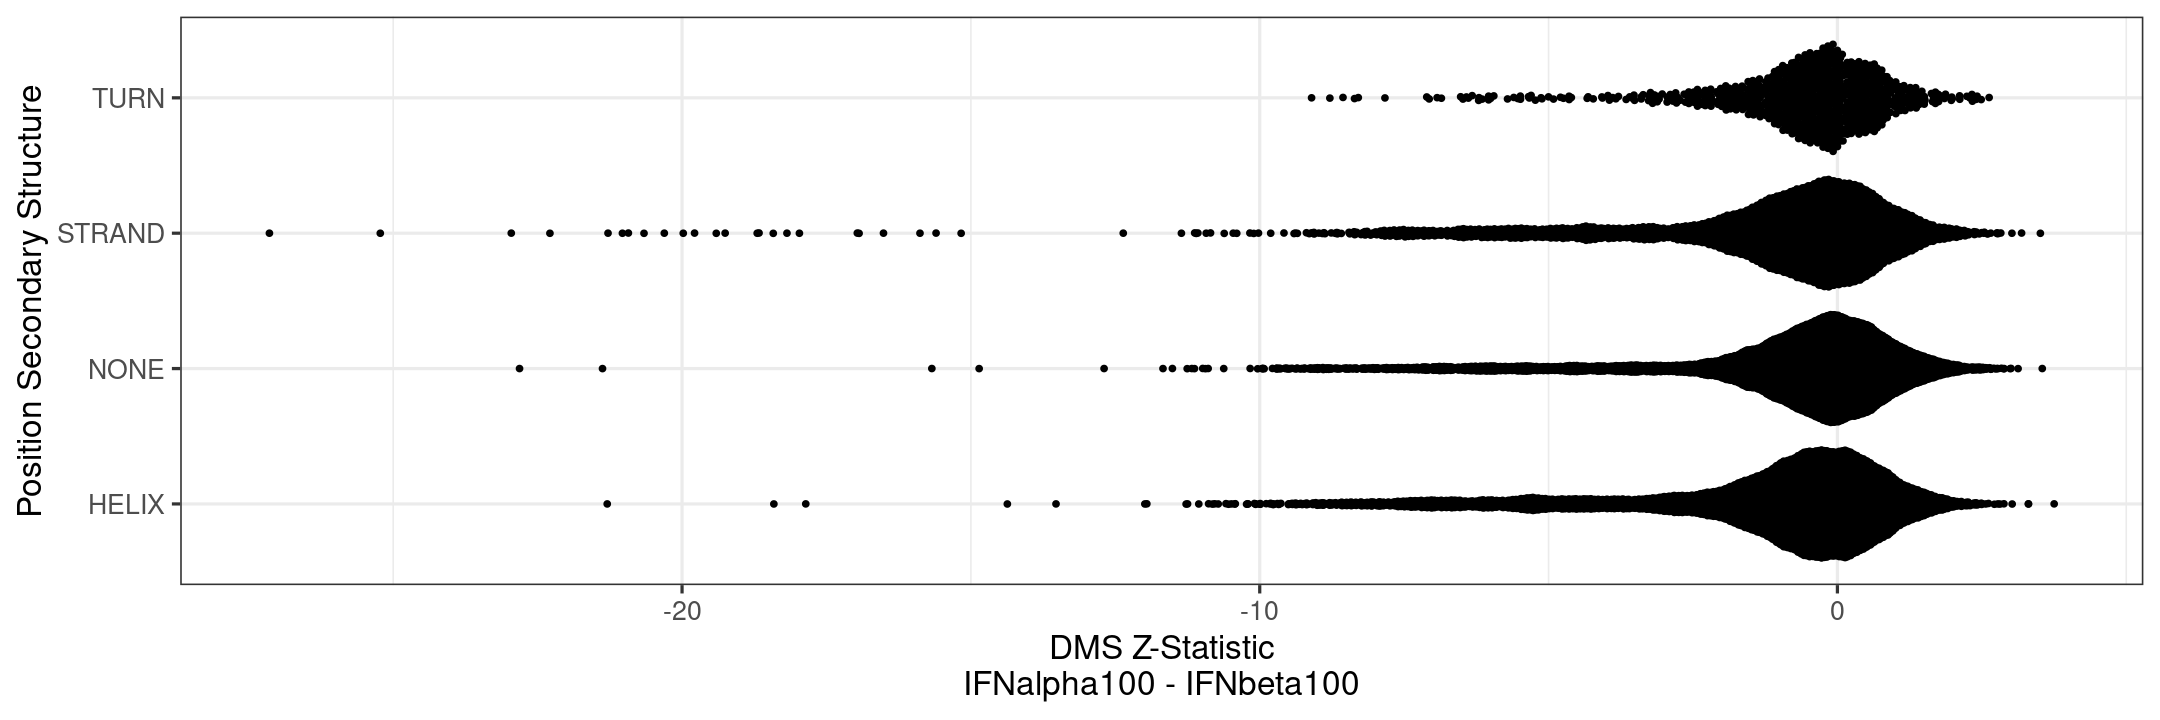

In [103]:
options(repr.plot.width = 18, repr.plot.height = 6)
ggplot(sumstats_struct) +
    geom_quasirandom(aes(x = type, y = statistic)) +
    theme_bw(base_size = 20) +
    coord_flip() +
    ylab("DMS Z-Statistic\nIFNalpha100 - IFNbeta100") +
    xlab("Position Secondary Structure")

Since different residues will have very different effects on protein functino, we can stratify this by the introduced amino acid. This also helps separate out stops, which are overwhelmingly negative:

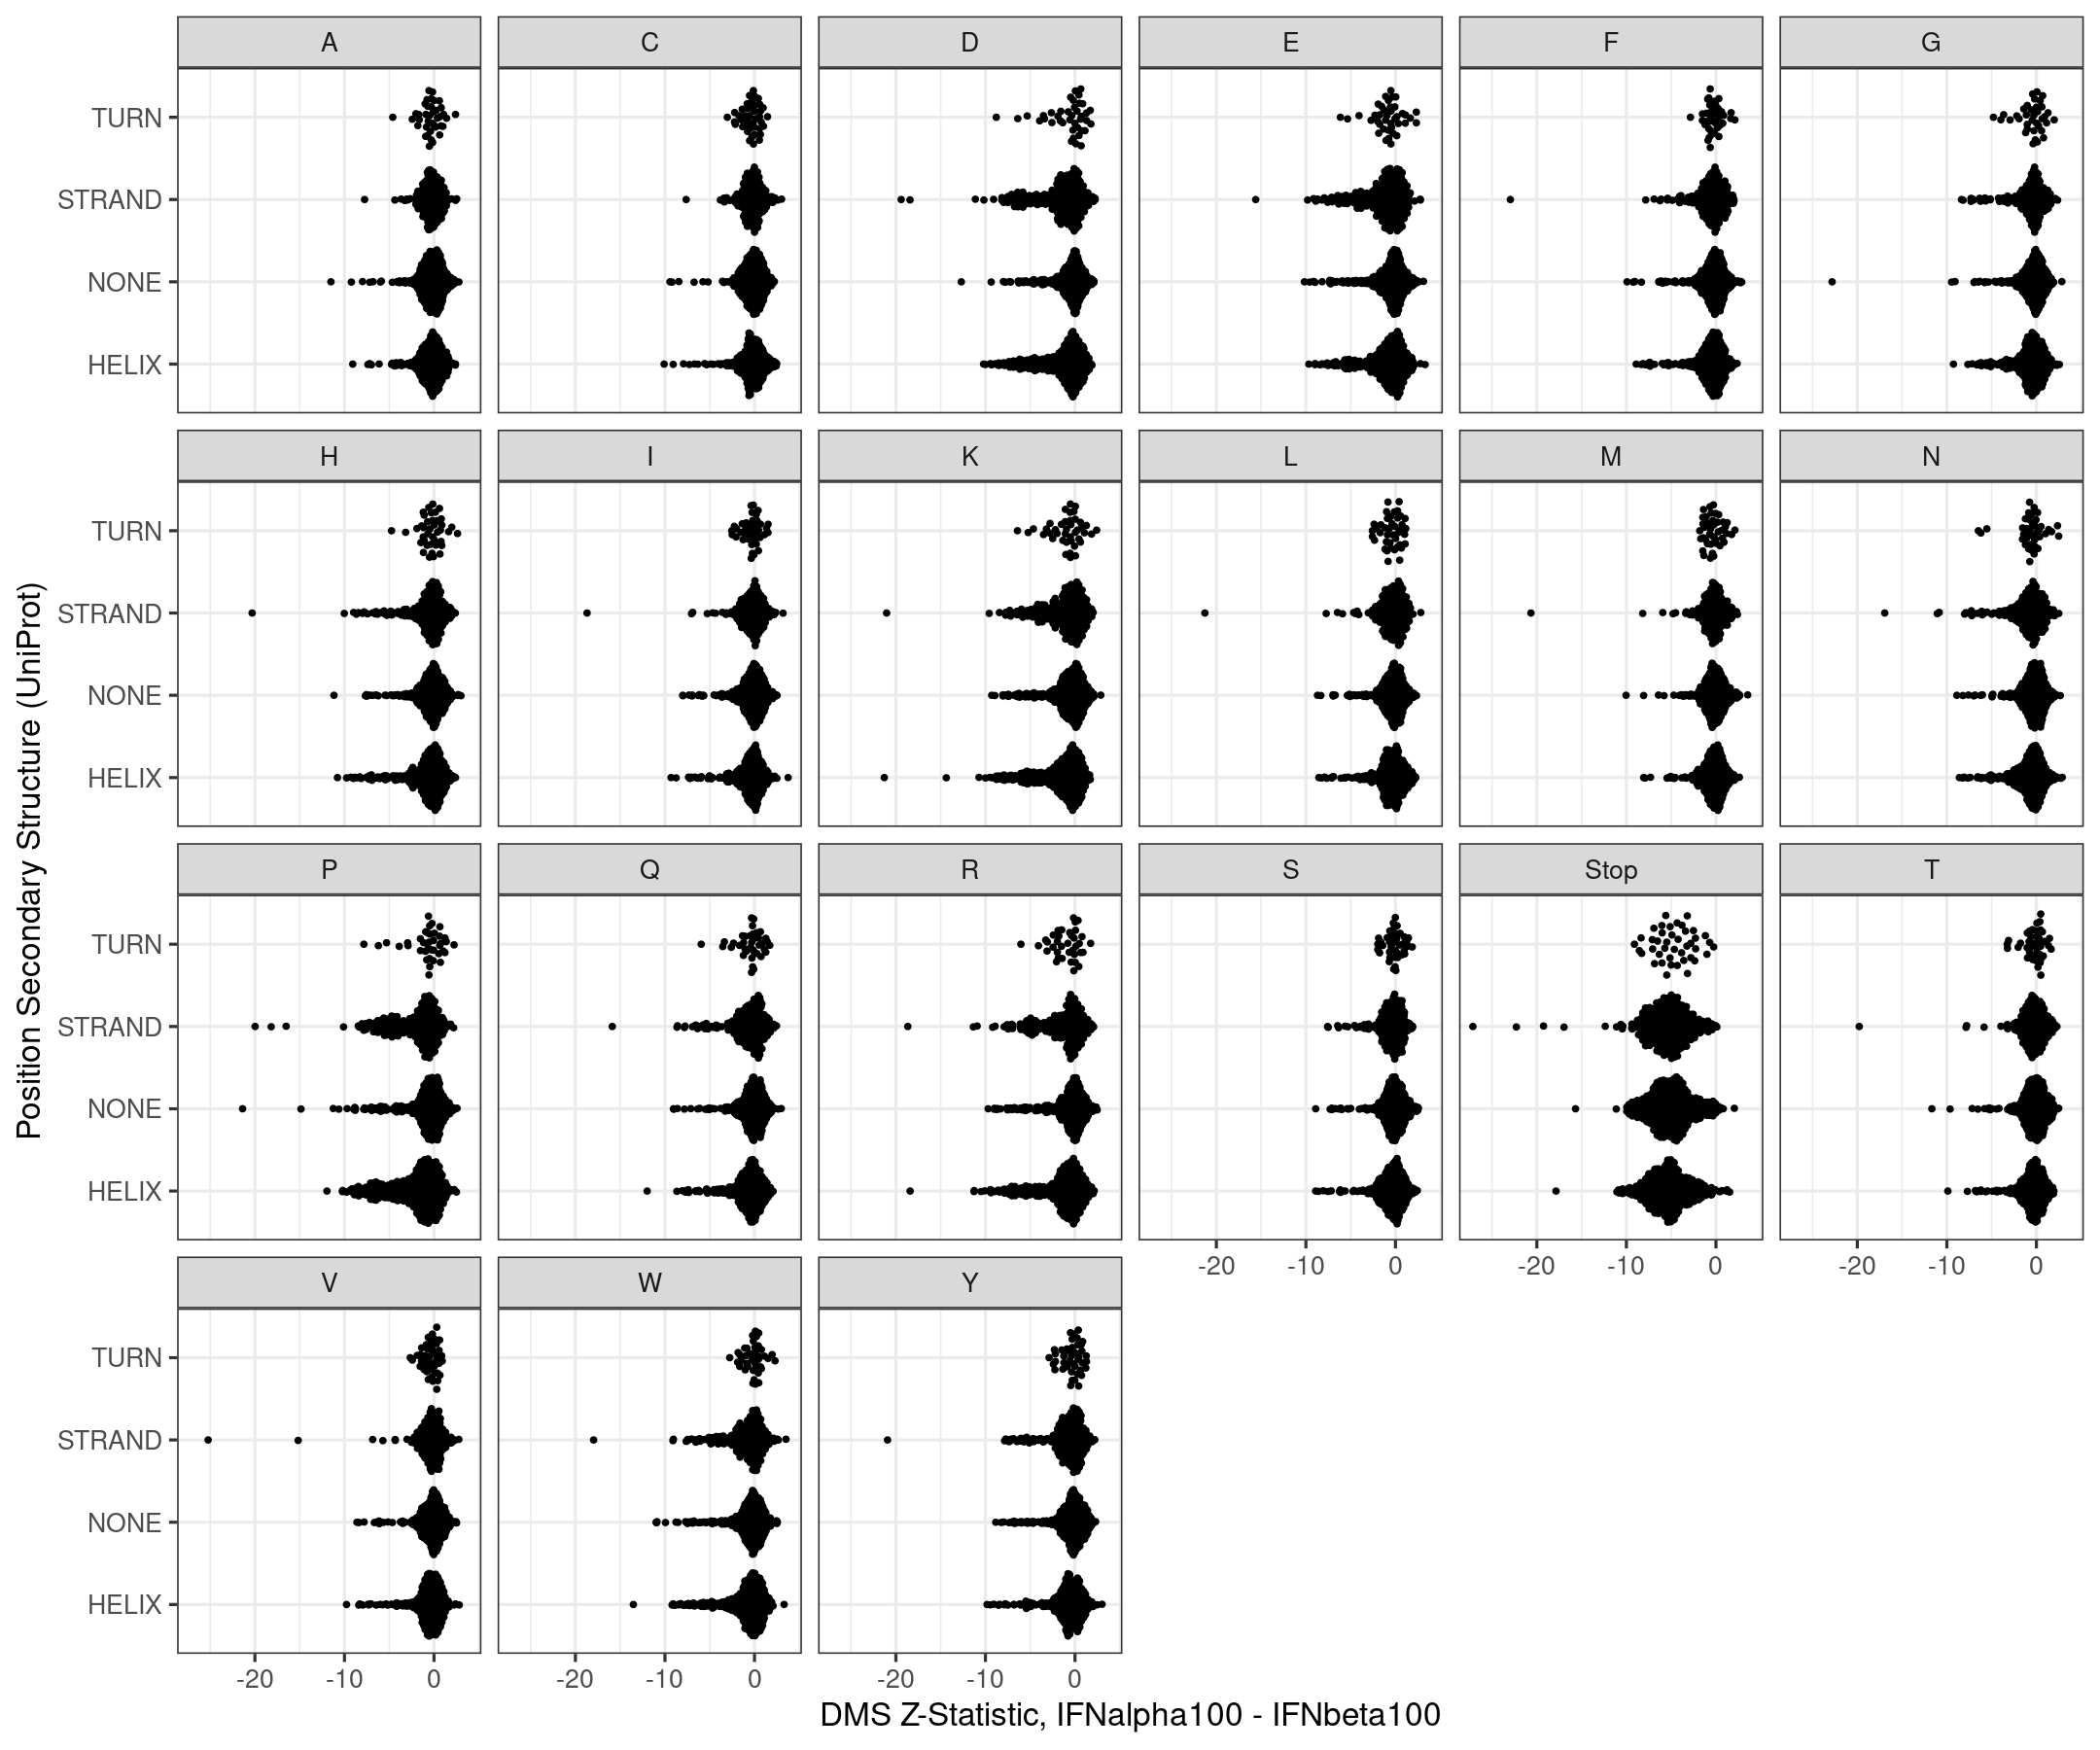

In [104]:
options(repr.plot.width = 18, repr.plot.height = 15)
ggplot(sumstats_struct) +
    geom_quasirandom(aes(x = type, y = statistic)) +
    theme_bw(base_size = 20) +
    coord_flip() +
    facet_wrap(~aa, ncol = 6) +
    ylab("DMS Z-Statistic, IFNalpha100 - IFNbeta100") +
    xlab("Position Secondary Structure (UniProt)")